# Price Prediction

### Part 1 - Price Evaluation

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import zscore
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

### Fetch Data

In [2]:
data_all = pd.read_csv('./data.csv')

In [3]:
data_all.head()


,Unnamed: 0,name,brand,2G,3G,4G,5G,Announced,Status,Weight,...,Bluetooth,GPU,Loudspeaker,3.5mm jack,Chipset,Network,Internal,Card slot,RAM,Storage
0,0,alcatel 1b (2022),alcatel,True,True,True,False,2022.0,Available,172.0,...,"5.0, A2DP",PowerVR GE8300,True,True,Mediatek MT6761 Helio A22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/11.1 Mbps, LTE Cat4...",32GB 2GB RAM,microSDXC (dedicated slot),2.0,32.0
1,1,alcatel 1l pro (2021),alcatel,True,True,True,False,2021.0,Available,190.0,...,"4.2, A2DP",IMG8322,True,True,Unisoc SC9863A (28nm),"GSM / HSPA / LTE HSPA 21.1/5.76 Mbps, LTE Cat4...",32GB 2GB RAM,microSDXC (uses shared SIM slot),2.0,32.0
2,2,alcatel 1 (2021),alcatel,True,True,True,False,2021.0,Available,134.0,...,"4.2, A2DP, LE",PowerVR GE8100,True,True,Mediatek MT6739 (28 nm),"GSM / HSPA / LTE HSPA 42.2/11.5 Mbps, LTE Cat4...","8GB 1GB RAM, 16GB 1GB RAM",microSDHC (dedicated slot),1.0,8.0
3,3,alcatel 3l (2021),alcatel,True,True,True,False,2021.0,Available,194.0,...,"5.0, A2DP, LE",PowerVR GE8320,True,True,Mediatek MT6762D Helio P22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4...",64GB 4GB RAM,microSDXC (only single sim model),4.0,64.0
4,4,alcatel 1s (2021),alcatel,True,True,True,False,2021.0,Available,190.0,...,"5.0, A2DP, LE",PowerVR GE8320,True,True,Mediatek MT6762D Helio P22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4...",32GB 3GB RAM,microSDXC (uses shared SIM slot),3.0,32.0


In [4]:
data_all.describe()

,Unnamed: 0,Announced,Weight,Display Size,ppi,body ratio,battery_capacity,Price,CPU,pixel,RAM,Storage
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2372.000000,2.651000e+03,2651.000000,2651.000000
mean,2495.184081,2016.577518,190.389325,5.759838,312.312335,71.775556,3385.437948,242.896775,5.847808,1.576779e+06,2.901974,46.621613
std,1290.683411,3.656827,97.208564,1.628346,101.907171,11.262514,1627.512406,193.726059,2.372880,1.181280e+06,2.493559,60.823522
min,0.000000,2010.000000,89.300000,2.200000,121.000000,25.500000,50.000000,20.000000,2.000000,7.680000e+04,0.062500,0.039062
25%,1450.000000,2014.000000,140.100000,4.700000,233.000000,64.650000,2070.000000,130.000000,4.000000,5.184000e+05,1.000000,8.000000
50%,2455.000000,2016.000000,167.000000,5.500000,288.000000,71.400000,3000.000000,190.000000,8.000000,1.094400e+06,2.000000,16.000000
75%,3681.000000,2020.000000,195.000000,6.530000,400.000000,81.800000,4500.000000,290.000000,8.000000,2.527200e+06,4.000000,64.000000
max,4678.000000,2024.000000,950.000000,14.600000,807.000000,94.100000,11560.000000,2000.000000,10.000000,8.294400e+06,16.000000,512.000000


In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2651 non-null   int64  
 1   name              2651 non-null   object 
 2   brand             2651 non-null   object 
 3   2G                2651 non-null   bool   
 4   3G                2651 non-null   bool   
 5   4G                2651 non-null   bool   
 6   5G                2651 non-null   bool   
 7   Announced         2651 non-null   float64
 8   Status            2651 non-null   object 
 9   Weight            2651 non-null   float64
 10  Length            2651 non-null   object 
 11  Width             2651 non-null   object 
 12  Diameter          2651 non-null   object 
 13  SIM               2651 non-null   object 
 14  Display Type      2651 non-null   object 
 15  Display Size      2651 non-null   float64
 16  ppi               2651 non-null   float64


In [6]:
result = data_all['Price']
data_all.drop('Price', axis=1, inplace=True)

In [7]:
data_df, data_test, result_train, result_test = train_test_split(data_all, result, test_size=0.15, random_state=42)

In [165]:
data = data_df.copy()
data['Price'] = result_train
data_test['Price'] = result_test

In [9]:
data.columns

Index(['Unnamed: 0', 'name', 'brand', '2G', '3G', '4G', '5G', 'Announced',
       'Status', 'Weight', 'Length', 'Width', 'Diameter', 'SIM',
       'Display Type', 'Display Size', 'ppi', 'body ratio', 'OS',
       'battery_capacity', 'CPU', 'ratio', 'pixel', 'WLAN', 'Colors',
       'Sensors', 'Bluetooth', 'GPU', 'Loudspeaker', '3.5mm jack', 'Chipset',
       'Network', 'Internal', 'Card slot', 'RAM', 'Storage', 'Price'],
      dtype='object')

In [9]:
data.shape, data_test.shape

((2253, 37), (398, 37))

### Pre-Proccessing

##### Data Convertion

Translate Sensors into sensors count

<Axes: >

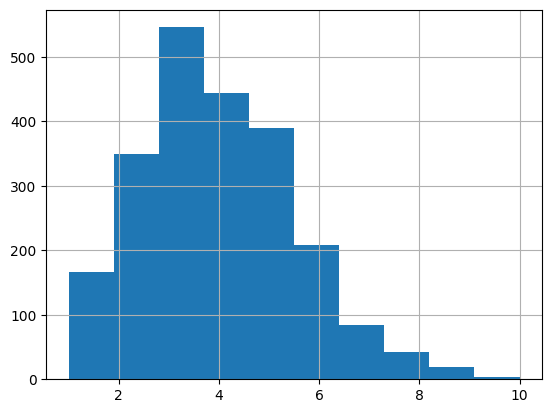

In [166]:
data['Sensors_count'] = data.Sensors.apply(lambda x: len(str(x).split(',') if x else 0))
data['Sensors_count'].hist()

convert Length, Width and Diameter into float type

In [167]:
data.Length = data.Length.apply(lambda x: ''.join(c for c in x if c.isdigit() or c=='.'))
data.Width = data.Width.apply(lambda x: ''.join(c for c in x if c.isdigit() or c=='.'))
data.Diameter = data.Diameter.apply(lambda x: x.split('-')[0])
data.Diameter = data.Diameter.apply(lambda x: ''.join(c for c in x if c.isdigit() or c=='.'))
data.Length = data.Length.astype('float64')
data.Width = data.Width.astype('float64')
data.Diameter = data.Diameter.astype('float64')

<Axes: >

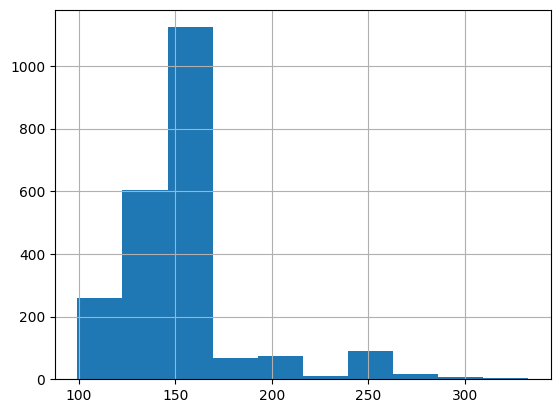

In [13]:
data.Length.hist()

<Axes: >

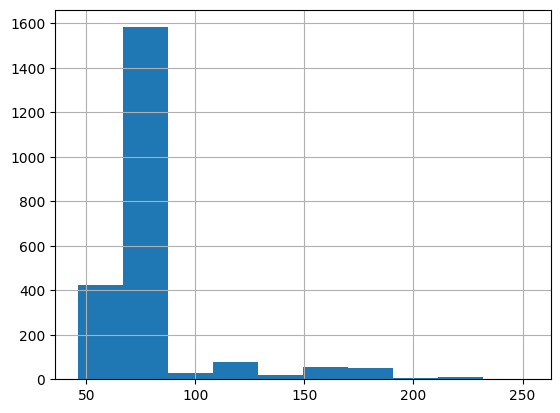

In [14]:
data.Width.hist()

<Axes: >

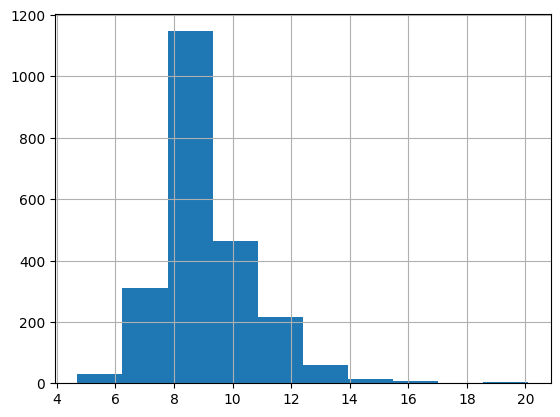

In [15]:
data.Diameter.hist()

clean OS data 

In [168]:
data.OS = data.OS.apply(lambda x: x.split(' ')[0].strip())
data.OS.value_counts()

OS
Android      2076
Phone          55
iOS            52
HarmonyOS      19
Symbian         8
Belle           7
KaiOS           6
iPadOS          5
platform        5
EMUI            4
Tizen           3
OS              3
Anna            3
FP1             2
Firefox         1
Linux           1
MeeGo           1
Windows         1
Mobile          1
Name: count, dtype: int64

In [169]:
def os_cleaner(x):
    if x != 'Android' and x != 'iOS':
        return 'Other'
    else:
        return x

data.OS = data.OS.apply(os_cleaner)
data.OS.value_counts()

OS
Android    2076
Other       125
iOS          52
Name: count, dtype: int64

convert 2G, 3G, 4G, 5G into integer

In [170]:
data['2G'] = data['2G'].astype('int')
data['3G'] = data['3G'].astype('int')
data['4G'] = data['4G'].astype('int')
data['5G'] = data['5G'].astype('int')

([<matplotlib.patches.Wedge at 0x7fcea7f48c70>,
 [Text(-0.3663560677916354, 1.037199706706597, "('4G',)"),
  Text(-0.09115911002479507, -1.0962162271465825, "('3G',)"),
  Text(0.9942754456849657, -0.47054897524908373, "('5G',)"),
  Text(1.0997904028118137, -0.02147253788047725, "('2G',)")])

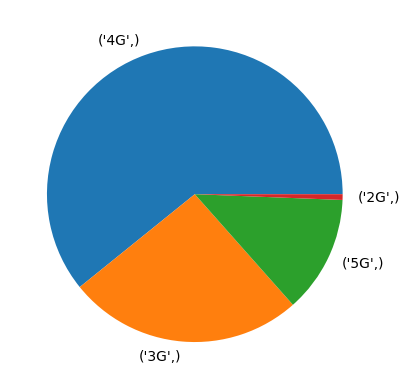

In [23]:
##### BAR CHART AND PIE CHART FOR NETWORK TYPE
df = pd.DataFrame(data=data['2G']+data['3G']+data['4G']+data['5G']+1, columns=['NetType'])
df.NetType = df.NetType.astype('str')
df.NetType = df.NetType.apply(lambda x: '{}G'.format(x))
dd = df.value_counts()
plt.pie(dd.values, labels=dd.index)

Cleaning Card slot column 

In [171]:
data['Card slot'] = data['Card slot'].apply(lambda x: x.split(' ')[0]).apply(lambda x:x.replace(',', ''))
data['Card slot'].value_counts()

Card slot
microSDXC      1232
microSDHC       582
No              386
NM               43
microSD           4
Unspecified       4
SD                1
Yes               1
Name: count, dtype: int64

Cleaning Bluetooth column

In [172]:
data.Bluetooth = data.Bluetooth.apply(lambda x: x.split(' ')[0].replace(',', '').split('(')[0].split('/')[0])
data.Bluetooth = data.Bluetooth.apply(lambda x: ''.join(c for c in x if c.isdigit() or c=='.'))
data.loc[data['Bluetooth']=='']['Bluetooth'] = 0.0
data.Bluetooth.value_counts()

Bluetooth
4.0    606
5.0    407
4.2    323
4.1    225
3.0    211
2.1    133
5.1    129
5.2    101
5.3     56
        41
2.0     10
3.1      6
5.4      5
Name: count, dtype: int64

##### Missing Values Handling

columns: 'Unnamed: 0', name will be removed, due to not having useful data

<Axes: >

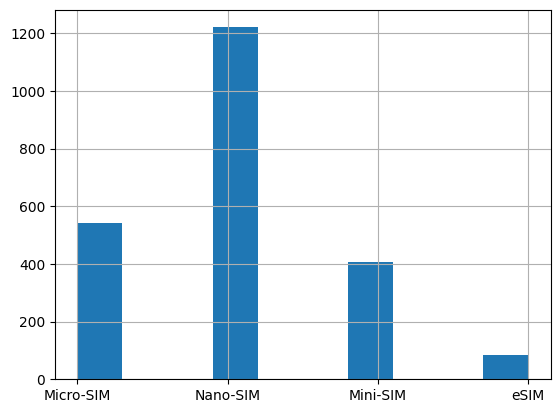

In [27]:
data.SIM.hist()

In [29]:
data['3.5mm jack'].astype('int').value_counts()

3.5mm jack
1    1994
0     259
Name: count, dtype: int64

'3.5mm jack' column will be removed because of unbalanced data

In [30]:
data['Network'].value_counts()

Network
GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4 150/50 Mbps                                                 281
GSM / HSPA / LTE HSPA, LTE                                                                                 203
GSM / HSPA HSPA 21.1/5.76 Mbps                                                                             186
GSM / HSPA / LTE HSPA, LTE-A                                                                               121
GSM / HSPA HSPA 7.2/5.76 Mbps                                                                               86
                                                                                                          ... 
GSM / HSPA / LTE HSPA, LTE-A (3CA) Cat9 450/50 Mbps                                                          1
GSM / CDMA / HSPA / CDMA2000 / LTE / 5G HSPA, LTE, 5G                                                        1
GSM / CDMA / HSPA / EVDO / LTE HSPA 42.2/5.76 Mbps, LTE-A (4CA) Cat12 600/150 Mbps                      

'Network' column will be removed because of having duplicate data with 2G, 3G, 4G and 5G columns

In [31]:
data.Internal.value_counts()

Internal
8GB 1GB RAM                                                                   161
16GB 2GB RAM                                                                  140
4GB 512MB RAM                                                                  99
32GB 3GB RAM                                                                   88
16GB 1GB RAM                                                                   78
                                                                             ... 
128GB 8GB RAM, 256GB 8GB RAM, 256GB 12GB RAM, 512GB 12GB RAM, 1TB 18GB RAM      1
128GB 6GB RAM, 256GB 6GB RAM, 256GB 8GB RAM                                     1
8GB 1GB RAM (H635,H540,H630D,H542), 16GB 2GB RAM (H631,MS631)                   1
32GB 2GB RAM, 32GB 3GB RAM, 64GB 4GB RAM, 128GB 4GB RAM, 128GB 6GB RAM          1
4GB (1.75GB user available), 512MB RAM                                          1
Name: count, Length: 442, dtype: int64

Internal will be removed due to having duplicate data with RAM and Storage

Colums Deletion

In [173]:
data.drop(['Unnamed: 0', 'name', 'Status', '3.5mm jack', 'Network', 'Sensors', 'Chipset', 
           'Internal', 'GPU', 'WLAN', 'Colors'], axis=1, inplace=True)
data.info()
#  ,'Length', 'Width', 'Diameter'
#'2G', '3G', '4G', '5G',

<class 'pandas.core.frame.DataFrame'>
Index: 2253 entries, 1313 to 860
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             2253 non-null   object 
 1   2G                2253 non-null   int64  
 2   3G                2253 non-null   int64  
 3   4G                2253 non-null   int64  
 4   5G                2253 non-null   int64  
 5   Announced         2253 non-null   float64
 6   Weight            2253 non-null   float64
 7   Length            2253 non-null   float64
 8   Width             2253 non-null   float64
 9   Diameter          2253 non-null   float64
 10  SIM               2253 non-null   object 
 11  Display Type      2253 non-null   object 
 12  Display Size      2253 non-null   float64
 13  ppi               2253 non-null   float64
 14  body ratio        2253 non-null   float64
 15  OS                2253 non-null   object 
 16  battery_capacity  2253 non-null   float64
 17

Row Deletion

In [90]:
print("List of Columns with NULL data:")
for col in data.columns:
    if(len(data[data[col].isna()])) > 0:
        print(col)

List of Columns with NULL data:
CPU


<Axes: >

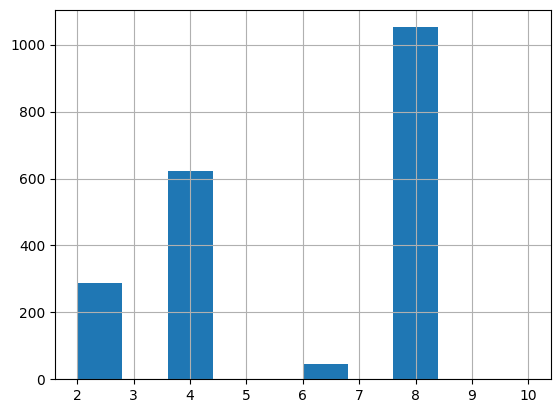

In [91]:
data.CPU.hist()

Filling Null values of CPU with median value of CPU

In [174]:
data.CPU.fillna(data.CPU.mean(), inplace=True)

Encode Data

In [175]:
le = LabelEncoder()
data['brand'] = le.fit_transform(data['brand'])
data.ratio = le.fit_transform(data.ratio)
data.SIM = le.fit_transform(data.SIM)
data.OS = le.fit_transform(data.OS)
data['Card slot'] = le.fit_transform(data['Card slot'])
data.Bluetooth = le.fit_transform(data.Bluetooth)
data.Loudspeaker  = le.fit_transform(data.Loudspeaker)
data['Display Type'] = le.fit_transform(data['Display Type'])

In [41]:
data.describe()

,brand,2G,3G,4G,5G,Announced,Weight,Length,Width,Diameter,...,CPU,ratio,pixel,Bluetooth,Loudspeaker,Card slot,RAM,Storage,Price,Sensors_count
count,2253.000000,2253.0,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2.253000e+03,...,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2.253000e+03
mean,7.641367,1.0,0.990235,0.739902,0.128273,2016.591212,190.328673,0.236883,0.162784,-2.523010e-17,...,6.090102,4.443853,0.182261,6.070573,0.755437,5.565912,2.909612,46.616172,243.766747,-1.198430e-16
std,3.742857,0.0,0.098355,0.438785,0.334468,3.661068,97.163629,0.135965,0.128025,1.000222e+00,...,2.336929,3.870813,0.144306,2.372857,0.429923,2.314663,2.501775,60.420501,196.144122,1.000222e+00
min,0.000000,1.0,0.000000,0.000000,0.000000,2010.000000,89.300000,0.000000,0.000000,-2.654073e+00,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.039062,20.000000,-1.644549e+00
25%,5.000000,1.0,1.000000,0.000000,0.000000,2014.000000,142.000000,0.153122,0.108370,-6.652635e-01,...,4.000000,1.000000,0.053738,5.000000,1.000000,6.000000,1.000000,8.000000,129.990000,-4.794016e-01
50%,8.000000,1.0,1.000000,1.000000,0.000000,2016.000000,167.300000,0.227973,0.134978,-1.831280e-01,...,8.000000,3.000000,0.123832,6.000000,1.000000,7.000000,2.000000,16.000000,190.000000,1.031722e-01
75%,10.000000,1.0,1.000000,1.000000,0.000000,2020.000000,195.000000,0.275021,0.148524,4.195414e-01,...,8.000000,9.000000,0.298189,8.000000,1.000000,7.000000,4.000000,64.000000,290.000000,6.857459e-01
max,13.000000,1.0,1.000000,1.000000,1.000000,2024.000000,950.000000,1.000000,1.000000,6.627036e+00,...,10.000000,12.000000,1.000000,12.000000,1.000000,7.000000,16.000000,512.000000,1880.000000,3.598615e+00


Seperate Answers from Data

In [176]:
Answer = data['Price']
data.drop('Price', axis=1, inplace=True)

#### Model

In [177]:
pf_4 = PolynomialFeatures(degree=4)
data2 = pf_4.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data2, Answer, test_size=0.15, random_state=42)

In [22]:
my_lr_d4_simple = LinearRegression()
my_lr_d4_simple.fit(X_train, y_train)
y_tr_d4_simple = my_lr_d4_simple.predict(X_train)
print("r2_score of train: ", r2_score(y_train, y_tr_d4_simple))
y_tst_d4_simple = my_lr_d4_simple.predict(X_test)
print("r2_score of test: ", r2_score(y_test, y_tst_d4_simple))

r2_score of train:  0.8864597316830518
r2_score of test:  -0.6204495295386523


Create train and test data as a polynomial with degree of 3

In [51]:
pf_3 = PolynomialFeatures(degree=3)
data2 = pf_3.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data2, Answer, test_size=0.15, random_state=42)

In [52]:
my_lr_d3_simple = LinearRegression()
my_lr_d3_simple.fit(X_train, y_train)
y_tr_d3_simple = my_lr_d3_simple.predict(X_train)
print("r2_score of train: ", r2_score(y_train, y_tr_d3_simple))
y_tst_d3_simple = my_lr_d3_simple.predict(X_test)
print("r2_score of test: ", r2_score(y_test, y_tst_d3_simple))

r2_score of train:  0.9955837548755078
r2_score of test:  -41653.51117101921


In [53]:
my_lr_d3_las = LinearRegression()
my_lr_d3_las = Lasso(alpha=0, max_iter=10000, precompute=True)
my_lr_d3_las.fit(X_train, y_train)
y_tr_d3_las = my_lr_d3_las.predict(X_train)
print("r2_score of train: ", r2_score(y_train, y_tr_d3_las))
y_tst_d3_las = my_lr_d3_las.predict(X_test)
print("r2_score of test: ", r2_score(y_test, y_tst_d3_las))

r2_score of train:  0.9470272690627984
r2_score of test:  -0.6893297789703077


In [26]:
my_lr_d3_el = LinearRegression()
my_lr_d3_el = ElasticNet(alpha=0, l1_ratio=0.01, max_iter=10000, precompute=True)
my_lr_d3_el.fit(X_train, y_train)
y_tr_d3_el = my_lr_d3_el.predict(X_train)
print("r2_score of train: ", r2_score(y_train, y_tr_d3_el))
y_tst_d3_el = my_lr_d3_el.predict(X_test)
print("r2_score of test: ", r2_score(y_test, y_tst_d3_el))

r2_score of train:  0.9341366551344226
r2_score of test:  0.18392793025024579


Create train and test data as a polynomial with degree of 2

In [178]:
pf_2 = PolynomialFeatures(degree=2)
data2 = pf_2.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data2, Answer, test_size=0.15, random_state=42)

In [179]:
my_lr_d2_simple = LinearRegression()
my_lr_d2_simple.fit(X_train, y_train)
y_tr_d2_simple = my_lr_d2_simple.predict(X_train)
print("r2_score of train: ", r2_score(y_train, y_tr_d2_simple))
y_tst_d2_simple = my_lr_d2_simple.predict(X_test)
print("r2_score of test: ", r2_score(y_test, y_tst_d2_simple))

r2_score of train:  0.8219505787667267
r2_score of test:  0.5794589361839613


In [180]:
my_lr_d2_las = LinearRegression()
my_lr_d2_las = Lasso(alpha=0, max_iter=10000, precompute=True)
my_lr_d2_las.fit(X_train, y_train)
y_tr_d2_las = my_lr_d2_las.predict(X_train)
print("r2_score of train: ", r2_score(y_train, y_tr_d2_las))
y_tst_d2_las = my_lr_d2_las.predict(X_test)
print("r2_score of test: ", r2_score(y_test, y_tst_d2_las))

r2_score of train:  0.8190406424904568
r2_score of test:  0.7264976811837736


In [181]:
my_lr_d2_el = LinearRegression()
my_lr_d2_el = ElasticNet(alpha=0, l1_ratio=0.01, max_iter=10000, precompute=True)
my_lr_d2_el.fit(X_train, y_train)
y_tr_d2_el = my_lr_d2_el.predict(X_train)
print("r2_score of train: ", r2_score(y_train, y_tr_d2_el))
y_tst_d2_el = my_lr_d2_el.predict(X_test)
print("r2_score of test: ", r2_score(y_test, y_tst_d2_el))

r2_score of train:  0.8190406424904568
r2_score of test:  0.7264976811837736


Create train and test data as a simple linear regression

In [47]:
pf_1 = PolynomialFeatures(degree=1)
data2 = pf_1.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data2, Answer, test_size=0.15, random_state=42)

In [48]:
my_lr_d1_simple = LinearRegression()
my_lr_d1_simple.fit(X_train, y_train)
y_tr_d1_simple = my_lr_d1_simple.predict(X_train)
print("r2_score of train: ", r2_score(y_train, y_tr_d1_simple))
y_tst_d1_simple = my_lr_d1_simple.predict(X_test)
print("r2_score of test: ", r2_score(y_test, y_tst_d1_simple))

r2_score of train:  0.6314249419565484
r2_score of test:  0.5951877251717459


In [49]:
my_lr_d1_las = LinearRegression()
my_lr_d1_las = Lasso(alpha=0, max_iter=10000, precompute=True)
my_lr_d1_las.fit(X_train, y_train)
y_tr_d1_las = my_lr_d1_las.predict(X_train)
print("r2_score of train: ", r2_score(y_train, y_tr_d1_las))
y_tst_d1_las = my_lr_d1_las.predict(X_test)
print("r2_score of test: ", r2_score(y_test, y_tst_d1_las))

r2_score of train:  0.6481874009820047
r2_score of test:  0.6058438266075207


In [50]:
my_lr_d1_el = LinearRegression()
my_lr_d1_el = ElasticNet(alpha=0, l1_ratio=0.01, max_iter=10000, precompute=True)
my_lr_d1_el.fit(X_train, y_train)
y_tr_d1_el = my_lr_d1_el.predict(X_train)
print("r2_score of train: ", r2_score(y_train, y_tr_d1_el))
y_tst_d1_el = my_lr_d1_el.predict(X_test)
print("r2_score of test: ", r2_score(y_test, y_tst_d1_el))

r2_score of train:  0.6481874009820047
r2_score of test:  0.6058438266075207


#### Evaluation

In [182]:
data_val = data_test.copy()
data_val['Price'] = result_test

In [183]:

data_val['Sensors_count'] = data_val.Sensors.apply(lambda x: len(str(x).split(',') if x else 0))
data_val.Length = data_val.Length.apply(lambda x: ''.join(c for c in x if c.isdigit() or c=='.'))
data_val.Width = data_val.Width.apply(lambda x: ''.join(c for c in x if c.isdigit() or c=='.'))
data_val.Diameter = data_val.Diameter.apply(lambda x: x.split('-')[0])
data_val.Diameter = data_val.Diameter.apply(lambda x: ''.join(c for c in x if c.isdigit() or c=='.'))
data_val.Length = data_val.Length.astype('float64')
data_val.Width = data_val.Width.astype('float64')
data_val.Diameter = data_val.Diameter.astype('float64')
data_val.OS = data_val.OS.apply(lambda x: x.split(' ')[0].strip())
data_val.OS = data_val.OS.apply(os_cleaner)

data_val['2G'] = data_val['2G'].astype('int')
data_val['3G'] = data_val['3G'].astype('int')
data_val['4G'] = data_val['4G'].astype('int')
data_val['5G'] = data_val['5G'].astype('int')

data_val['Card slot'] = data_val['Card slot'].apply(lambda x: x.split(' ')[0]).apply(lambda x:x.replace(',', ''))

data_val.Bluetooth = data_val.Bluetooth.apply(lambda x: x.split(' ')[0].replace(',', '').split('(')[0].split('/')[0])
data_val.Bluetooth = data_val.Bluetooth.apply(lambda x: ''.join(c for c in x if c.isdigit() or c=='.'))
data_val.loc[data_val['Bluetooth']=='']['Bluetooth'] = 0.0

data_val['Sensors_count'] = data_val.Sensors.apply(lambda x: len(str(x).split(',') if x else 0))

data_val.drop(['Unnamed: 0', 'name', 'Status', '3.5mm jack', 'Network', 'Sensors', 'Chipset', 
           'Internal', 'GPU', 'WLAN', 'Colors'], axis=1, inplace=True)

data_val.CPU.fillna(data_val.CPU.median(), inplace=True)

data_val['brand'] = le.fit_transform(data_val['brand'])
data_val.ratio = le.fit_transform(data_val.ratio)
data_val.SIM = le.fit_transform(data_val.SIM)
data_val.OS = le.fit_transform(data_val.OS)
data_val['Card slot'] = le.fit_transform(data_val['Card slot'])
data_val.Bluetooth = le.fit_transform(data_val.Bluetooth)
data_val.Loudspeaker  = le.fit_transform(data_val.Loudspeaker)
data_val['Display Type'] = le.fit_transform(data_val['Display Type'])

Answer = data_val['Price']
data_val.drop('Price', axis=1, inplace=True)



In [184]:
data2 = pf_2.fit_transform(data_val)

In [185]:
y_val_d2_el = my_lr_d2_el.predict(data2)
print("r2_score of test: ", r2_score(Answer, y_val_d2_el))

r2_score of test:  0.6117900975577961
